In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# preprocessamento

this is the preprocessing

In [6]:
print(df)

       -0.02391236  -0.02401346  -0.02304432  -0.02232109  -0.02331689  \
0        -0.029697    -0.031294    -0.031996    -0.032873    -0.035989   
1         0.015346     0.022967     0.021720     0.025659     0.033641   
2         0.034159     0.026964     0.018613     0.010513     0.004142   
3        -0.013908    -0.015051    -0.016022    -0.016802    -0.017303   
4        -0.046529    -0.051738    -0.057115    -0.061385    -0.063750   
5        -0.046026    -0.050453    -0.053213    -0.053302    -0.050187   
6        -0.056478    -0.051991    -0.046922    -0.042087    -0.038069   
7        -0.112870    -0.124841    -0.140322    -0.151157    -0.159357   
8         0.022086     0.017514     0.012135     0.005401    -0.002513   
9         0.019715     0.022732     0.025851     0.029103     0.032460   
10       -0.034887    -0.035561    -0.036153    -0.037098    -0.038145   
11        0.105411     0.098311     0.090353     0.083711     0.080208   
12       -0.013141    -0.012218    -0.

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf

df = pd.read_csv('samples_nylonGuitar_1024_Mm7-R02.csv')

X = np.array(df.iloc[:,:-1], dtype=np.float)
y = np.array(df.iloc[:,-1], dtype=np.float)

In [72]:
import librosa

sample = librosa.core.stft(y=X[0], n_fft=1024, hop_length=None, win_length=512, window='hamming', center=True, dtype=np.float, pad_mode='reflect')


print(sample)
print(sample.shape)
print(y[0])
sample = np.append(y[0],sample)
print(sample)
print(sample.shape)

[[ -7.20238646e-01  -5.01544944e-01   1.82757751e-01 ...,   1.73593716e-01
    6.20198082e-01   1.67341409e+00]
 [  7.08208600e-01   3.09872305e-01  -1.14695638e-01 ...,  -1.53498110e-01
   -2.44648974e-01  -1.96945409e+00]
 [ -9.03699447e-01   2.37903816e-01  -1.87462273e-01 ...,   7.58210044e-02
   -5.34895728e-01   2.37967327e+00]
 ..., 
 [  1.05264864e-03   8.77487351e-04   1.83663915e-03 ...,  -2.48573993e-03
   -3.26628623e-03  -1.72389814e-03]
 [ -1.09274858e-03  -4.15664566e-04  -1.70912561e-06 ...,  -3.63465717e-06
    6.41556900e-04   1.64839065e-03]
 [  1.12225790e-03  -2.90219230e-04  -1.83748116e-03 ...,   2.48593392e-03
    2.35290024e-03  -1.58178132e-03]]
(513, 9)
1.0
[ 1.         -0.72023865 -0.50154494 ...,  0.00248593  0.0023529
 -0.00158178]
(4618,)


/home/venturus/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/librosa/core/spectrum.py:180: ComplexWarning: Casting complex values to real discards the imaginary part
  axis=0)[:stft_matrix.shape[0]].conj()


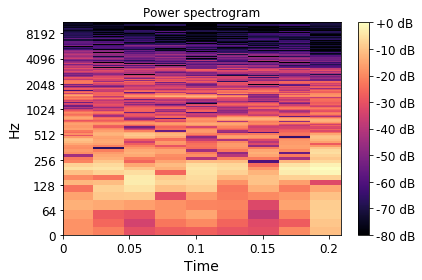

In [67]:
>>> import matplotlib.pyplot as plt
>>> import librosa.display
>>> librosa.display.specshow(librosa.amplitude_to_db(sample,
...                                                  ref=np.max),
...                          y_axis='log', x_axis='time')
>>> plt.title('Power spectrogram')
>>> plt.colorbar(format='%+2.0f dB')
>>> plt.tight_layout()

/home/venturus/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/librosa/core/spectrum.py:180: ComplexWarning: Casting complex values to real discards the imaginary part
  axis=0)[:stft_matrix.shape[0]].conj()


0

200

400

600

800

1000

1200

1400

1600

1800

2000

2200

2400

2600

2800

3000

3200

3400

3600

3800

4000

4200

4400

4600

4800

5000

5200

5400

5600

5800

6000

6200

6400

6600

6800

7000

7200

7400

7600

7800

8000

8200

8400

8600

8800

9000

9200

9400

9600

9800

10000

10200

10400

10600

10800

11000

11200

11400

11600

11800

12000

12200

12400

12600

12800

13000

13200

13400

13600

13800

14000

14200



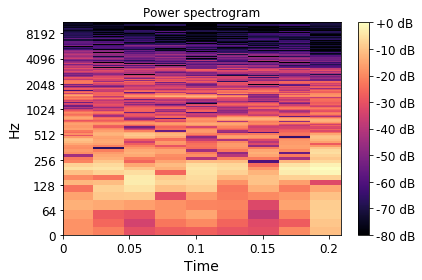

In [83]:
import os

processedData_path = "preprocessedSamples_spect.data"
processedX = np.zeros((len(X),513,9), dtype=np.float)
processedy = np.zeros(len(y), dtype=np.float)

for i in range(len(X)):
    processedX[i] = librosa.core.stft(y=X[i], n_fft=1024, hop_length=None, win_length=512, window='hamming', center=True, dtype=np.float, pad_mode='reflect')
    processedy[i] = y[i]
    if i % 200 == 0:
        print(i)
        print()
        
librosa.display.specshow(librosa.amplitude_to_db(processedX[0], ref=np.max), y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

In [87]:
print(y.shape)
print(processedX.shape)
print(processedX[0])

(14377,)
(14377, 513, 9)
[[ -7.20238646e-01  -5.01544944e-01   1.82757751e-01 ...,   1.73593716e-01
    6.20198082e-01   1.67341409e+00]
 [  7.08208600e-01   3.09872305e-01  -1.14695638e-01 ...,  -1.53498110e-01
   -2.44648974e-01  -1.96945409e+00]
 [ -9.03699447e-01   2.37903816e-01  -1.87462273e-01 ...,   7.58210044e-02
   -5.34895728e-01   2.37967327e+00]
 ..., 
 [  1.05264864e-03   8.77487351e-04   1.83663915e-03 ...,  -2.48573993e-03
   -3.26628623e-03  -1.72389814e-03]
 [ -1.09274858e-03  -4.15664566e-04  -1.70912561e-06 ...,  -3.63465717e-06
    6.41556900e-04   1.64839065e-03]
 [  1.12225790e-03  -2.90219230e-04  -1.83748116e-03 ...,   2.48593392e-03
    2.35290024e-03  -1.58178132e-03]]


17.0
[[  1.95922258e+00   1.03590766e+00  -1.23067703e+00 ...,   9.23308824e-01
   -4.25524418e+00  -1.10792321e+01]
 [ -1.69531925e+00  -1.01451686e+00   1.26848861e+00 ...,  -2.35745692e+00
    3.04443921e+00   1.12322442e+01]
 [  1.44905293e+00   5.99939357e-01  -9.23831485e-01 ...,   5.17595771e+00
   -6.68261559e-01  -1.07472377e+01]
 ..., 
 [  3.49846245e-03  -5.47086092e-03  -1.22077517e-03 ...,  -4.17653975e-03
    1.74089252e-03  -3.68710975e-03]
 [ -3.53146756e-03  -1.35335789e-03   3.38745165e-05 ...,   1.78744980e-05
    1.33232707e-03   3.48844846e-03]
 [  3.53221925e-03   7.36893488e-03   1.22086106e-03 ...,   4.17720528e-03
   -3.66927959e-03  -3.29608320e-03]]


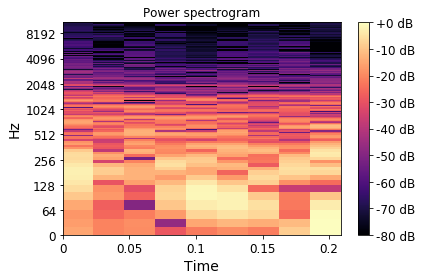

In [98]:
from sklearn.utils import shuffle
processedX, processedy = shuffle(processedX, processedy)

X_train = np.array(processedX[:-2000], dtype=np.float)
y_train = np.array(processedy[:-2000], dtype=np.float)

X_valid = np.array(processedX[-2000:-1000], dtype=np.float)
y_valid = np.array(processedy[-2000:-1000], dtype=np.float)

X_test = np.array(processedX[-1000:], dtype=np.float)
y_test = np.array(processedy[-1000:], dtype=np.float)
print(y_test[999])
print(X_test[999])


librosa.display.specshow(librosa.amplitude_to_db(X_test[999], ref=np.max), y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

In [94]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.exceptions import NotFittedError
import tensorflow as tf
import numpy as np

he_init = tf.contrib.layers.variance_scaling_initializer()

class DNNClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_hidden_layers=5, n_neurons=100, optimizer_class=tf.train.AdamOptimizer,
                 learning_rate=0.01, batch_size=20, activation=tf.nn.elu, initializer=he_init,
                 batch_norm_momentum=None, dropout_rate=None, random_state=None):
        """Initialize the DNNClassifier by simply storing all the hyperparameters."""
        self.n_hidden_layers = n_hidden_layers
        self.n_neurons = n_neurons
        self.optimizer_class = optimizer_class
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.activation = activation
        self.initializer = initializer
        self.batch_norm_momentum = batch_norm_momentum
        self.dropout_rate = dropout_rate
        self.random_state = random_state
        self._session = None

    def _dnn(self, inputs):
        """Build the hidden layers, with support for batch normalization and dropout."""
        for layer in range(self.n_hidden_layers):
            if self.dropout_rate:
                inputs = tf.layers.dropout(inputs, self.dropout_rate, training=self._training)
            inputs = tf.layers.dense(inputs, self.n_neurons,
                                     kernel_initializer=self.initializer,
                                     name="hidden%d" % (layer + 1))
            if self.batch_norm_momentum:
                inputs = tf.layers.batch_normalization(inputs, momentum=self.batch_norm_momentum,
                                                       training=self._training)
            inputs = self.activation(inputs, name="hidden%d_out" % (layer + 1))
        return inputs

    def _build_graph(self, n_inputs, n_outputs):
        """Build the same model as earlier"""
        if self.random_state is not None:
            tf.set_random_seed(self.random_state)
            np.random.seed(self.random_state)

        X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
        y = tf.placeholder(tf.int32, shape=(None), name="y")

        if self.batch_norm_momentum or self.dropout_rate:
            self._training = tf.placeholder_with_default(False, shape=(), name='training')
        else:
            self._training = None

        dnn_outputs = self._dnn(X)

        logits = tf.layers.dense(dnn_outputs, n_outputs, kernel_initializer=he_init, name="logits")
        Y_proba = tf.nn.softmax(logits, name="Y_proba")

        xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                                  logits=logits)
        loss = tf.reduce_mean(xentropy, name="loss")

        optimizer = self.optimizer_class(learning_rate=self.learning_rate)
        training_op = optimizer.minimize(loss)

        correct = tf.nn.in_top_k(logits, y, 1)
        accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

        init = tf.global_variables_initializer()
        saver = tf.train.Saver()

        # Make the important operations available easily through instance variables
        self._X, self._y = X, y
        self._Y_proba, self._loss = Y_proba, loss
        self._training_op, self._accuracy = training_op, accuracy
        self._init, self._saver = init, saver

    def close_session(self):
        if self._session:
            self._session.close()

    def _get_model_params(self):
        """Get all variable values (used for early stopping, faster than saving to disk)"""
        with self._graph.as_default():
            gvars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)
        return {gvar.op.name: value for gvar, value in zip(gvars, self._session.run(gvars))}

    def _restore_model_params(self, model_params):
        """Set all variables to the given values (for early stopping, faster than loading from disk)"""
        gvar_names = list(model_params.keys())
        assign_ops = {gvar_name: self._graph.get_operation_by_name(gvar_name + "/Assign")
                      for gvar_name in gvar_names}
        init_values = {gvar_name: assign_op.inputs[1] for gvar_name, assign_op in assign_ops.items()}
        feed_dict = {init_values[gvar_name]: model_params[gvar_name] for gvar_name in gvar_names}
        self._session.run(assign_ops, feed_dict=feed_dict)

    def fit(self, X, y, n_epochs=100, X_valid=None, y_valid=None):
        """Fit the model to the training set. If X_valid and y_valid are provided, use early stopping."""
        self.close_session()

        # infer n_inputs and n_outputs from the training set.
        n_inputs = X.shape[1]
        self.classes_ = np.unique(y)
        n_outputs = len(self.classes_)
        
        # Translate the labels vector to a vector of sorted class indices, containing
        # integers from 0 to n_outputs - 1.
        # For example, if y is equal to [8, 8, 9, 5, 7, 6, 6, 6], then the sorted class
        # labels (self.classes_) will be equal to [5, 6, 7, 8, 9], and the labels vector
        # will be translated to [3, 3, 4, 0, 2, 1, 1, 1]
        self.class_to_index_ = {label: index
                                for index, label in enumerate(self.classes_)}
        y = np.array([self.class_to_index_[label]
                      for label in y], dtype=np.int32)
        
        self._graph = tf.Graph()
        with self._graph.as_default():
            self._build_graph(n_inputs, n_outputs)

        # needed in case of early stopping
        max_checks_without_progress = 20
        checks_without_progress = 0
        best_loss = np.infty
        best_params = None

        # extra ops for batch normalization
        extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
        
        # Now train the model!
        self._session = tf.Session(graph=self._graph)
        with self._session.as_default() as sess:
            self._init.run()
            for epoch in range(n_epochs):
                rnd_idx = np.random.permutation(len(X))
                for rnd_indices in np.array_split(rnd_idx, len(X) // self.batch_size):
                    X_batch, y_batch = X[rnd_indices], y[rnd_indices]
                    feed_dict = {self._X: X_batch, self._y: y_batch}
                    if self._training is not None:
                        feed_dict[self._training] = True
                    sess.run(self._training_op, feed_dict=feed_dict)
                    if extra_update_ops:
                        sess.run(extra_update_ops, feed_dict=feed_dict)
                if X_valid is not None and y_valid is not None:
                    loss_val, acc_val = sess.run([self._loss, self._accuracy],
                                                 feed_dict={self._X: X_valid,
                                                            self._y: y_valid})
                    if loss_val < best_loss:
                        best_params = self._get_model_params()
                        best_loss = loss_val
                        checks_without_progress = 0
                    else:
                        checks_without_progress += 1
                    print("{}\tValidation loss: {:.6f}\tBest loss: {:.6f}\tAccuracy: {:.2f}%".format(
                        epoch, loss_val, best_loss, acc_val * 100))
                    if checks_without_progress > max_checks_without_progress:
                        print("Early stopping!")
                        break
                else:
                    loss_train, acc_train = sess.run([self._loss, self._accuracy],
                                                     feed_dict={self._X: X_batch,
                                                                self._y: y_batch})
                    print("{}\tLast training batch loss: {:.6f}\tAccuracy: {:.2f}%".format(
                        epoch, loss_train, acc_train * 100))
            # If we used early stopping then rollback to the best model found
            if best_params:
                self._restore_model_params(best_params)
            return self

    def predict_proba(self, X):
        if not self._session:
            raise NotFittedError("This %s instance is not fitted yet" % self.__class__.__name__)
        with self._session.as_default() as sess:
            return self._Y_proba.eval(feed_dict={self._X: X})

    def predict(self, X):
        print(self.predict_proba(X))
        class_indices = np.argmax(self.predict_proba(X), axis=1)
        print(class_indices)
        return np.array([[self.classes_[class_index]]
                         for class_index in class_indices], np.int32)

    def save(self, path):
        self._saver.save(self._session, path)

    def restore(self, path, X, y):
        self.close_session()

        # infer n_inputs and n_outputs from the training set.
        n_inputs = X.shape[1]
        self.classes_ = np.unique(y)
        n_outputs = len(self.classes_)

        self._graph = tf.Graph()
        with self._graph.as_default():
            self._build_graph(n_inputs, n_outputs)

        self._session = tf.Session(graph=self._graph)
        
        self._saver.restore(self._session, path)

In [99]:
from sklearn.cross_validation import cross_val_score

def fitAndPredict (name, model, trainX, trainY, validX, validY):
	k = 3
	#kfold = model_selection.KFold(n_splits=10, random_state=seed)
	scores = cross_val_score(model, trainX, trainY, cv = k, n_jobs = 4) #Evaluate a score by cross-validation
	hitRate = np.mean(scores) #calculates the average

	msg = "{0}'s hit rate: {1}".format(name, hitRate)
	print (msg)
	return hitRate, msg

In [101]:
dnn = DNNClassifier(batch_size=100, learning_rate=0.05, 
                    n_hidden_layers=3, n_neurons=700, 
                    optimizer_class=tf.train.AdagradOptimizer)

print(X_train.shape,y_train.shape, X_valid.shape, y_valid.shape)

dnn.fit(X=X_train, y=y_train, X_valid=X_valid, y_valid=y_valid)
dnn.save("final_model_test/final_model.ckpt")


(12377, 513, 9) (12377,) (1000, 513, 9) (1000,)


ValueError: Cannot feed value of shape (101, 513, 9) for Tensor 'X:0', which has shape '(?, 513)'

In [20]:
predicted = dnn.predict(np.reshape(X_test[0],(1,512)))
print(predicted)

[[  3.82452570e-10   4.86530567e-08   2.22736745e-08   1.36866798e-12
    4.19524554e-07   6.93580091e-07   2.88088777e-05   3.36679165e-07
    2.99180897e-07   4.65879069e-09   1.32732794e-08   5.53779529e-08
    3.97058664e-10   3.15335562e-08   3.63032804e-08   5.53287027e-10
    1.61222999e-08   5.54930490e-10   2.42241555e-07   4.70479972e-06
    1.05014946e-11   1.06358318e-10   1.77978708e-11   3.70685238e-09
    3.86386574e-03   1.39387222e-02   2.71322278e-05   7.33060413e-04
    1.51800603e-04   3.77882799e-07   5.14903768e-05   1.99434602e-08
    3.66058561e-09   3.73960091e-07   1.95146640e-06   1.97968572e-01
    8.31735974e-07   1.03101559e-06   7.22097466e-04   8.11979771e-06
    3.77160775e-10   6.20426420e-07   4.20468815e-08   2.48681488e-07
    6.27181027e-03   2.93638438e-01   1.89782325e-02   4.63605523e-01]]
[47]
[[47]]
